In [1]:
import numpy as np

# Getting Matrix Values
pairCSV  = np.genfromtxt("series.csv", skip_header=1, delimiter=",", dtype=float)
pairCSVt = pairCSV.T

# Set the floatmode to 'fixed'
np.set_printoptions(floatmode='fixed')

# Display the transposed CSV data
print(pairCSVt.astype(int))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12]
 [   5    9   13   17   21   25   29   33   37   41   45   49   53]
 [   5   12   25   44   69  100  137  180  229  284  345  412  485]
 [   5   14   41   98  197  350  569  866 1253 1742 2345 3074 3941]]


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read data from CSV file directly
# into a pandas DataFrame,
# strip leading spaces from column names
df = pd.read_csv("series.csv") \
  .rename(columns=lambda x: x.strip())

In [4]:
print(df)

    xs  ys1  ys2   ys3
0    0    5    5     5
1    1    9   12    14
2    2   13   25    41
3    3   17   44    98
4    4   21   69   197
5    5   25  100   350
6    6   29  137   569
7    7   33  180   866
8    8   37  229  1253
9    9   41  284  1742
10  10   45  345  2345
11  11   49  412  3074
12  12   53  485  3941


In [5]:
# Define selected columns
cols_sel = ['ys1', 'ys2', 'ys3']

In [6]:
# Melt the DataFrame to long format for FacetGrid
df_melted = df.melt(
  id_vars='xs', value_vars=cols_sel)

In [7]:
print(df_melted.T)

           0    1    2    3    4    5    6    7    8    9   ...   29   30  \
xs          0    1    2    3    4    5    6    7    8    9  ...    3    4   
variable  ys1  ys1  ys1  ys1  ys1  ys1  ys1  ys1  ys1  ys1  ...  ys3  ys3   
value       5    9   13   17   21   25   29   33   37   41  ...   98  197   

           31   32   33    34    35    36    37    38  
xs          5    6    7     8     9    10    11    12  
variable  ys3  ys3  ys3   ys3   ys3   ys3   ys3   ys3  
value     350  569  866  1253  1742  2345  3074  3941  

[3 rows x 39 columns]


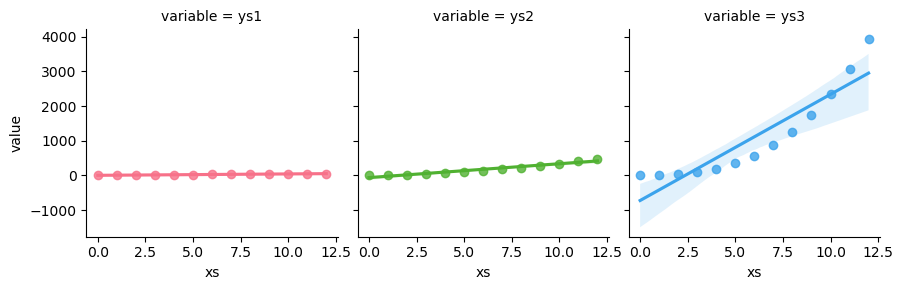

In [8]:
# Create a FacetGrid with seaborn
g = sns.FacetGrid(df_melted,
  col='variable', col_wrap=3,
  sharex=False, sharey=True)

# Iterate over selected columns and
# map regplot to each column in the FacetGrid
for ax, col in zip(g.axes.flatten(), cols_sel):
  df_subset = df.melt(
    id_vars='xs', value_vars=col)

  color = sns.color_palette("husl", 3)[
    cols_sel.index(col)]

  sns.regplot(x='xs', y='value',
    data=df_subset, ax=ax, color=color)

# Adjust layout
plt.tight_layout()